In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from glob import glob

In [8]:
DATA_PATH = '../data/'
df_eeg = pd.read_parquet(DATA_PATH + 'train_eegs/3625731.parquet')
df_eeg.head()

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,10.960000,9.52,14.500000,-5.33,5.37,-25.280001,3.36,-12.09,21.150000,-3.37,-15.07,14.680000,-11.440000,13.61,-15.980000,39.040001,-12.24,-11.92,-7.89,-368.950012
1,29.530001,12.89,16.200001,-7.42,3.30,-26.780001,2.05,-15.65,25.190001,-5.30,-17.08,41.720001,-7.790000,6.81,-16.930000,38.090000,-15.45,-13.94,-11.37,81.120003
2,-9.600000,9.92,15.260000,-4.46,5.88,-22.360001,5.50,-10.74,13.760000,-6.38,-12.61,-9.620000,-16.200001,9.83,-17.830000,37.720001,-11.58,-11.42,-6.68,317.910004
3,-1.200000,12.84,18.719999,-1.42,9.70,-19.660000,6.00,-9.57,20.059999,-1.61,-11.26,-3.140000,-14.060000,16.84,-16.190001,38.520000,-9.49,-12.15,-7.77,-271.170013
4,35.139999,17.32,23.070000,-2.19,7.16,-22.110001,4.15,-13.63,31.469999,-0.44,-13.63,45.810001,-6.350000,11.93,-15.860000,38.389999,-15.24,-14.87,-12.50,-139.929993


In [10]:
df_spectrogram = pd.read_parquet(DATA_PATH + 'train_spectrograms/3452193.parquet')
df_spectrogram.head()

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,7.35,14.310000,14.940000,21.830000,37.400002,30.410000,38.000000,29.900000,27.520000,...,1.11,1.07,0.94,1.18,0.63,0.38,0.47,0.27,0.33,0.52
1,3,8.07,12.220000,16.650000,15.450000,26.620001,18.139999,36.580002,35.919998,38.830002,...,4.48,3.55,2.96,2.40,1.89,1.35,2.12,2.30,1.96,2.11
2,5,14.44,19.760000,20.629999,22.299999,20.799999,24.709999,25.580000,28.580000,24.670000,...,2.32,1.96,1.82,3.72,2.57,5.15,4.39,3.09,2.97,1.39
3,7,20.52,22.209999,31.530001,29.360001,23.120001,14.440000,15.980000,16.520000,14.960000,...,2.51,2.58,3.71,5.68,4.56,4.62,3.26,1.77,2.17,1.97
4,9,7.16,20.870001,20.870001,26.840000,34.430000,19.730000,26.250000,19.430000,17.350000,...,2.04,2.33,1.39,2.01,2.18,1.80,1.85,1.89,2.27,1.75


In [13]:
df = pd.read_csv(DATA_PATH+'train.csv')
targets_cols = df.columns[-6:]
print('Train shape:', df.shape )
print('Targets', list(targets_cols))
df.head()

Train shape: (106800, 15)
Targets ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


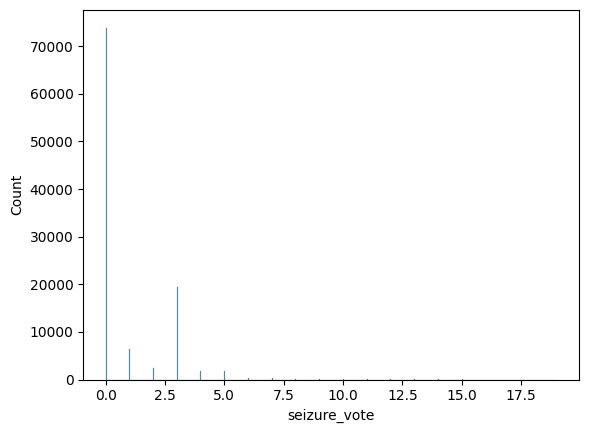

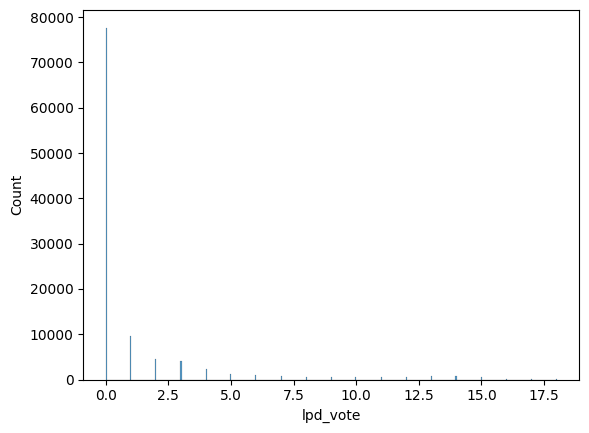

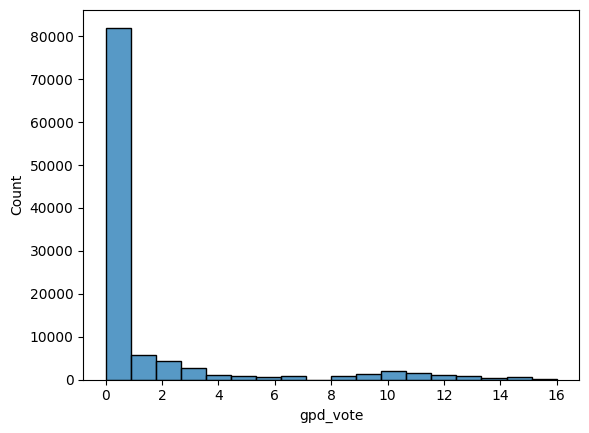

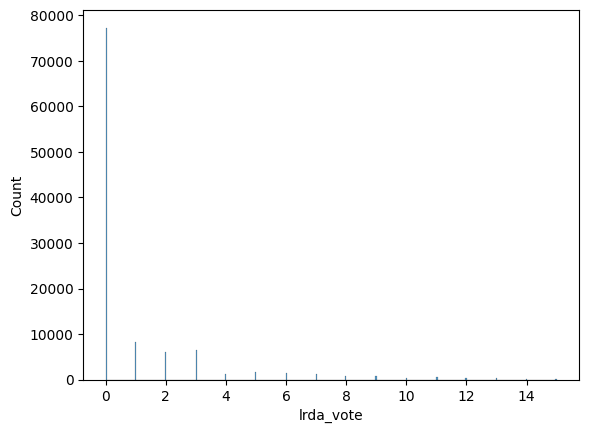

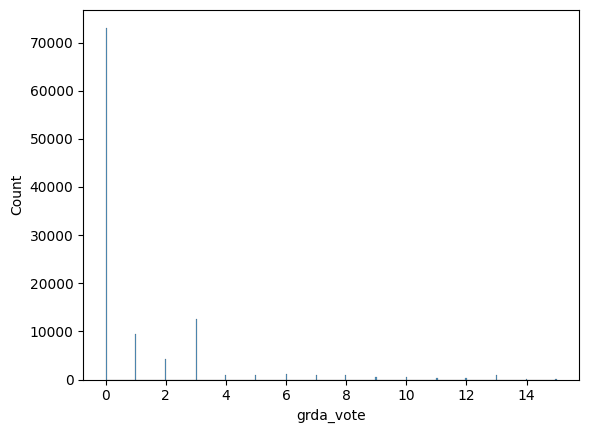

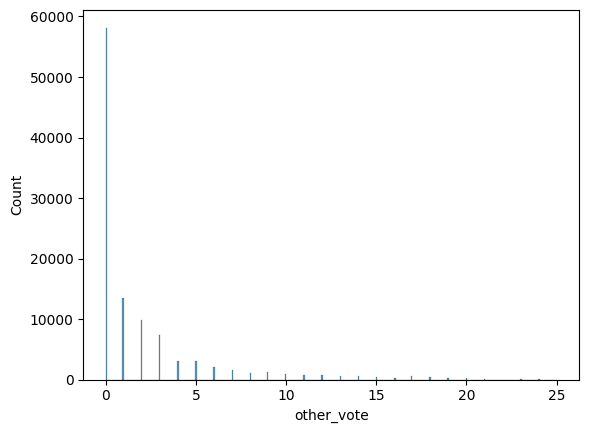

In [16]:
for col in targets_cols:
    g = sns.histplot(df[col])
    plt.show()

<Axes: xlabel='total_votes', ylabel='Count'>

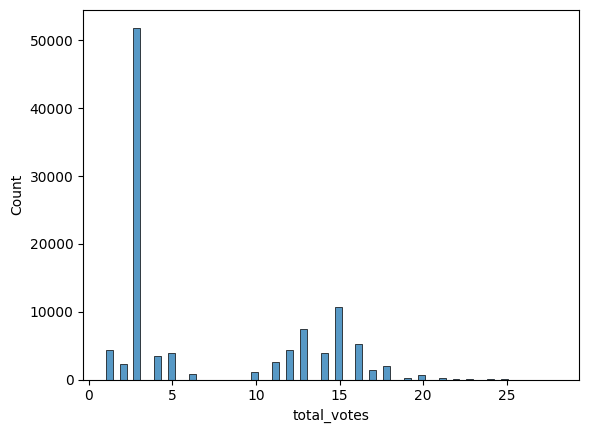

In [19]:
df['total_votes'] = df[targets_cols].sum(axis=1)
sns.histplot(df['total_votes'])
# majority of cases have 3 votes.

In [21]:
df[['total_votes', 'eeg_id']].groupby('total_votes').count()

,eeg_id
total_votes,
1,4360
2,2316
3,51867
4,3451
5,3974
6,883
7,3
10,1146
11,2602


In [22]:
df[df['total_votes']<3]
# consider dropping these cases

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_votes
54,2578018731,0,0.0,2207717,0,0.0,2581514982,34153,Other,0,0,0,0,0,1,1
65,3083733314,0,0.0,2957373,0,0.0,643458890,23828,Other,0,0,0,0,0,1,1
67,138236967,0,0.0,3252414,0,0.0,239963779,44623,Other,0,0,0,0,0,1,1
68,1448756052,0,0.0,3252414,1,512.0,1605170669,44623,Other,0,0,0,0,0,1,1
100,2184415503,0,0.0,4651057,0,0.0,164296540,47284,Other,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106627,3588723605,8,82.0,2144587113,8,82.0,3500813196,56450,LPD,0,1,0,0,0,0,1
106628,3588723605,9,110.0,2144587113,9,110.0,1290717271,56450,LPD,0,1,0,0,0,0,1
106629,3588723605,10,146.0,2144587113,10,146.0,3732632046,56450,LPD,0,1,0,1,0,0,2
106723,1437016107,0,0.0,2145805074,0,0.0,1221972194,20588,Other,0,0,0,0,0,2,2
